The purpose of this method is just to explore the method and consider (A) how more advanced users may interact and (B) how sensitivity testing may work

In [14]:
# Import libraries
import numpy as np

import scipy
from scipy.stats import norm, lognorm

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf

import pandas as pd

In [17]:
def calculate_cumulative_conf(areaP90: float=1., areaP10: float=10., pdP90: float=10., pdP10: float=24):
    """Calculate cumulative confidence level for expected development size in MW

    Args:
        areaP90 (float): pessimistic area in sqkm
        areaP10 (float): optimistic area in sqkm
        pdP90 (float): pessimistic power density in MWe/sqkm
        pdP10 (float): optimistic power density in MWe/sqkm

    Returns:
        prob_df (pandas Dataframe): cumulative confidence curve in Reservoir Size
    """
    # calculate area > 250 °C
    area_mu = ((np.log(areaP90)+np.log(areaP10))/2)
    area_sigma = (np.log(areaP10)-np.log(areaP90))/((norm.ppf(0.9)-(norm.ppf(0.1))))

    # calculate powerdensity mean and standard dev
    powerdens_mu = ((np.log(pdP90)+np.log(pdP10))/2)
    powerdens_sigma = (np.log(pdP10)-np.log(pdP90))/((norm.ppf(0.9)-(norm.ppf(0.1))))


    capacity_mu = area_mu + powerdens_mu
    capacity_sigma = ((area_sigma**2)+(powerdens_sigma**2))**0.5
    eds = [lognorm.ppf(x/100, capacity_sigma, loc=0, scale=np.exp(capacity_mu)) for x in range(0,100)]
    indx = list(np.arange(1,101)[::-1])
    #edsepc_tups = list(zip(indx,eds))
    #prob_df = pd.DataFrame(edsepc_tups, columns = ['Cumulative confidence (%)', 'expected development size (MW)'])

    return indx, eds

def set_save_image(fig, savename, dpi=1200):
    '''Save figure as PDF that can be edited in illustrator

    Adapted from Eleanor Lutz's function. Designed to work with matplotlib.
    To use, simply place "set_save_image(fig, savename)" after the figure code

    Args:   
        fig (object): matplotlib figure object
        savename (string): name figure will export with
    
    Returns:
        exports figure as pdf

    '''
    # Output text as editable PDF text objects instead of shapes
    matplotlib.rcParams['pdf.fonttype'] = 42
    
    # Force PDF to respect zorder by supressing image compositing
    matplotlib.rcParams['image.composite_image'] = False

    # Remove all padding and margins
    plt.tight_layout()
    #plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    #plt.margins(0,0)
    #plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    #plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")

    plt.show()
    plt.clf()
    plt.close('all')

,Cum_conf_%,1,5,10,15,20,25,30
0,100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,99,0.391175,0.552227,0.520497,0.486278,0.458301,0.435458,0.416433
2,98,0.499719,0.744523,0.735914,0.709694,0.684972,0.663358,0.644555
3,97,0.583720,0.899926,0.916762,0.902075,0.883897,0.866423,0.850408
4,96,0.656094,1.037861,1.081544,1.080454,1.070776,1.059202,1.047552


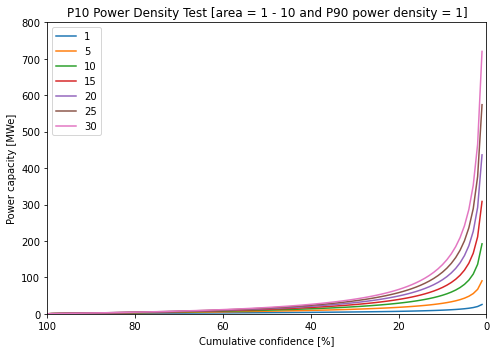

In [19]:
# Test the effect of varying the P10 power density

# make a dataframe just with the index
index, estimate = calculate_cumulative_conf(2, 8, 10, 15)
df = pd.DataFrame(index, columns = ['Cum_conf_%'])

# calculate power capacity using a range of P10 power densities
P90_area = 1
P10_area = 10
P90_powerdensity = 1
P10_powerdensities = [1,5,10,15,20,25,30]

for P10_powerdensity in P10_powerdensities:
    index, estimate = calculate_cumulative_conf(P90_area, P10_area, P90_powerdensity, P10_powerdensity)
    column_head = str(P10_powerdensity)
    df[column_head] = estimate

display(df.head())

# plot results
fig, ax = plt.subplots(1,1,figsize=(7,5))

for P10_powerdensity in P10_powerdensities:
    ax.plot(
        df['Cum_conf_%'],
        df[str(P10_powerdensity)],
        label = str(P10_powerdensity)
        )

ax.set_xlim(100,0)
ax.set_ylim(0,800)
ax.set_xlabel('Cumulative confidence [%]')
ax.set_ylabel('Power capacity [MWe]')
ax.set_title('P10 Power Density Test [area = 1 - 10 and P90 power density = 1]')
ax.legend()

savename = 'Explore_method__vary_P10.pdf'
set_save_image(fig, savename)

,Cum_conf_%,1,5,10,15,20
0,100,0.000000,0.000000,0.000000,0.000000,0.000000
1,99,0.458301,2.757834,5.042582,6.666144,7.823490
2,98,0.684972,3.670381,6.512121,8.532114,9.994374
3,97,0.883897,4.400237,7.659360,9.978382,11.674397
4,96,1.070776,5.043450,8.653749,11.225779,13.121884


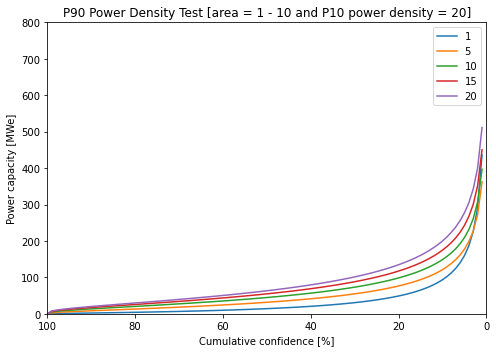

In [20]:
# Test the effect of varying the P90 power density

# make a dataframe just with the index
index, estimate = calculate_cumulative_conf(2, 8, 10, 15)
df = pd.DataFrame(index, columns = ['Cum_conf_%'])

# calculate power capacity using a range of P10 power densities
P90_area = 1
P10_area = 10
P90_powerdensities = [1,5,10,15,20]
P10_powerdensity = 20


for P90_powerdensity in P90_powerdensities:
    index, estimate = calculate_cumulative_conf(P90_area, P10_area, P90_powerdensity, P10_powerdensity)
    column_head = str(P90_powerdensity)
    df[column_head] = estimate

display(df.head())

# plot results
fig, ax = plt.subplots(1,1,figsize=(7,5))

for P90_powerdensity in P90_powerdensities:
    ax.plot(
        df['Cum_conf_%'],
        df[str(P90_powerdensity)],
        label = str(P90_powerdensity)
        )

ax.set_xlim(100,0)
ax.set_ylim(0,800)
ax.set_xlabel('Cumulative confidence [%]')
ax.set_ylabel('Power capacity [MWe]')
ax.set_title('P90 Power Density Test [area = 1 - 10 and P10 power density = 20]')
ax.legend()

savename = 'Explore_method__vary_P90.pdf'
set_save_image(fig, savename)

In [33]:
index, estimate = calculate_cumulative_conf(2, 8, 10, 15)
print(index)

[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


(-1.0, 4.0)

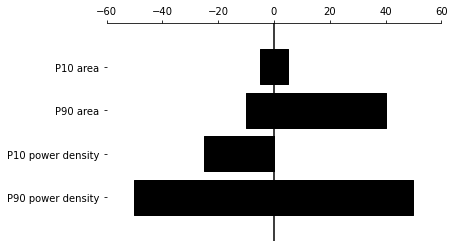

In [32]:
# adapted from https://stackoverflow.com/questions/32132773/a-tornado-chart-and-p10-p90-in-python-matplotlib

variables = [
    'P10 area',
    'P90 area',
    'P10 power density',
    'P90 power density',
]

base = 0

lows = np.array([
    base - 10 / 2,
    base - 20 / 2,
    base - 50 / 2,
    base - 100 / 2,
])

# the range between the min and max result
values = np.array([
    10,
    50,
    20,
    100,
])

###############################################################################
# The actual drawing part

# The y position for each variable
ys = range(len(values))[::-1]  # top to bottom

# Plot the bars, one by one
for y, low, value in zip(ys, lows, values):
    # The width of the 'low' and 'high' pieces
    low_width = base - low
    high_width = low + value - base

    # Each bar is a "broken" horizontal bar chart
    plt.broken_barh(
        [(low, low_width), (base, high_width)], # bar left limit, bar length to the right
        (y - 0.4, 0.8),
        facecolors=['black', 'black'],
        edgecolors=['black', 'black'],
        linewidth=1,
    )

# Draw a vertical line down the middle
plt.axvline(base, color='black')

# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.xaxis.set_ticks_position('top')

# Make the y-axis display the variables
plt.yticks(ys, variables)

# Set the portion of the x- and y-axes to show
plt.xlim(base - 60, base + 60)
plt.ylim(-1, len(variables))

(-1.0, 4.0)

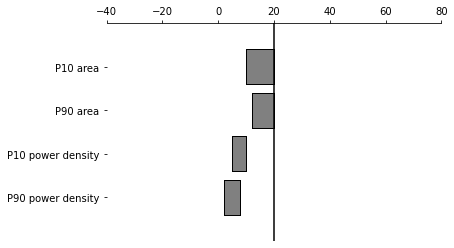

In [36]:
# adapted from https://stackoverflow.com/questions/32132773/a-tornado-chart-and-p10-p90-in-python-matplotlib

variables = [
    'P10 area',
    'P90 area',
    'P10 power density',
    'P90 power density',
]

base = 20

P90s = np.array([
    10,
    12,
    5,
    2,
])

P50s = np.array([
    20,
    20,
    10,
    8,
])

P10s = np.array([
    50,
    30,
    20,
    20,
])


###############################################################################
# The actual drawing part

# The y position for each variable
ys = range(len(P90s))[::-1]  # top to bottom

# Plot the bars, one by one
for y, P90, P50, P10 in zip(ys, P90s, P50s, P10s):
    # The width of the 'low' and 'high' pieces
    P90_to_P50_width = P50 - P90
    P50_to_P90_width = P90 - P50

    # Each bar is a "broken" horizontal bar chart
    plt.broken_barh(
        (P90, P90_to_P50_width) # bar left limit, bar length to the right
        (y - 0.4, 0.8),
        facecolors=['black', 'black'],
        edgecolors=['black', 'black'],
        linewidth=1,
    )

    plt.broken_barh(
        (P50, P50_to_P90_width), # bar left limit, bar length to the right
        (y - 0.4, 0.8),
        facecolors=['black', 'grey'],
        edgecolors=['black', 'black'],
        linewidth=1,
    )

# Draw a vertical line down the middle
plt.axvline(base, color='black')

# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.xaxis.set_ticks_position('top')

# Make the y-axis display the variables
plt.yticks(ys, variables)

# Set the portion of the x- and y-axes to show
plt.xlim(base - 60, base + 60)
plt.ylim(-1, len(variables))

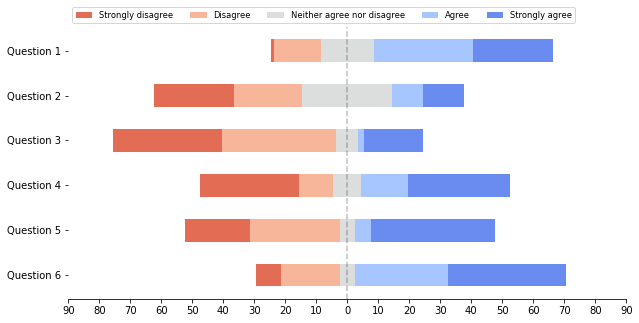

In [35]:
# adapted from https://stackoverflow.com/questions/32132773/a-tornado-chart-and-p10-p90-in-python-matplotlib

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [1, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    """
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2
    
    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
    
    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)
    
    # X Axis
    ax.set_xlim(-90, 90)
    ax.set_xticks(np.arange(-90, 91, 10))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))
    
    # Y Axis
    ax.invert_yaxis()
    
    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Ledgend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax


fig, ax = survey(results, category_names)
plt.show()